In [1]:
 #part(a)
import matplotlib.pyplot as plt
import numpy as np
import math

Part a.  Generate numtrials realizations of a Binomial(n, p) random variable and plots them in sequence. Generate and turn in a plot for 100 realizations of a Binomial(10,1/2) random variable. Generate and turn in a plot for 100 realizations of a Binomial(10,0.2)

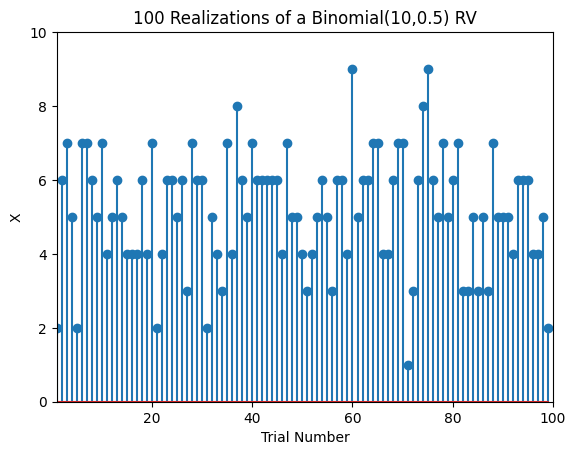

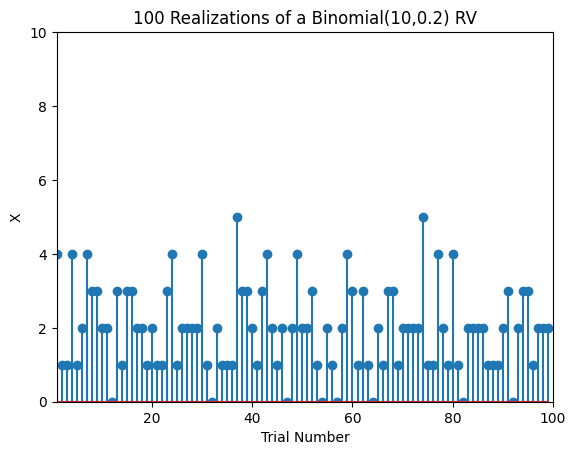

In [2]:
#Parameters
n = 10
p = 0.5
numtrials = 100


#Generate Binomial(n,p) random variables
X = np.random.binomial(n,p,numtrials)
#Plot
fig = plt.figure()
plt.stem(X)
plt.axis([1, numtrials, 0, n])
plt.xlabel('Trial Number')
plt.ylabel('X')
plt.title(f"{numtrials} Realizations of a Binomial({n},{p}) RV")
plt.show()
fig.savefig('hw2a1python.png')

#Parameters
n = 10
p = 0.2
numtrials = 100


#Generate Binomial(n,p) random variables
X = np.random.binomial(n,p,numtrials)
#Plot
fig = plt.figure()
plt.stem(X)
plt.axis([1, numtrials, 0, n])
plt.xlabel('Trial Number')
plt.ylabel('X')

plt.title(f"{numtrials} Realizations of a Binomial({n},{p}) RV")
plt.show()
fig.savefig('hw2a2python.png')

Part b. The code framework below generates a bar plot of the number of occurrences of each value from 0 to n, normalized by the number of trials. Your job is to fill in the lines of code needed to count the number of occurrences of the values i in the sequence X and also calculate the PMF of a Binomial(n, p) random variable for X = i. Then, for n = 10 and p = 1/2, generate and turn in plots for 100, 1000, and 10000 trials.


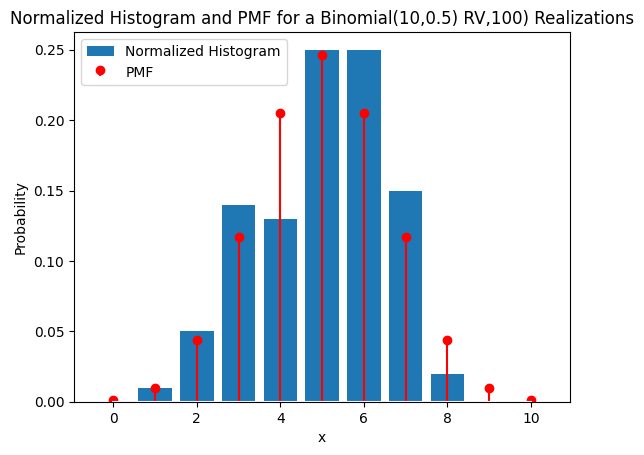

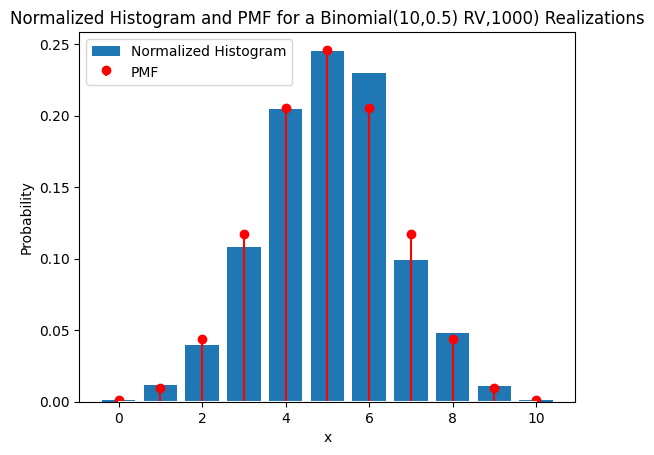

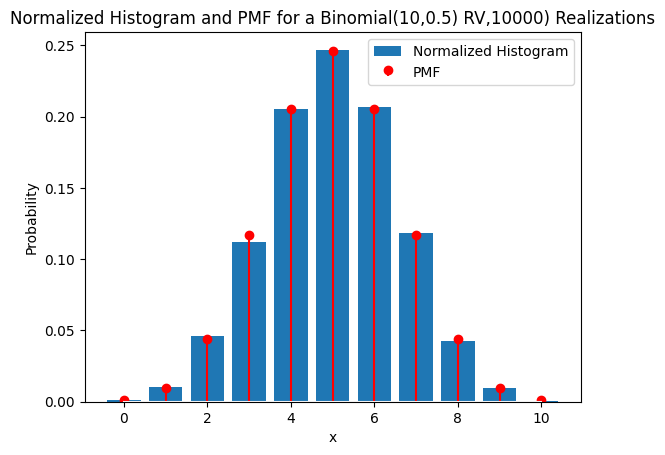

In [3]:
#part(b)
#Parameters
n = 10
p = 0.5
trials = [100,1000,10000]
for numtrials in trials:
    #Generate Binomial(n,p) random variables
    X = np.random.binomial(n,p,numtrials)
    #Initialize arrays
    counts = np.zeros(n+1)
    pmf = np.zeros(n+1)
    #Count number of times each value occurs
    for value in X:
        counts[value] += 1

    #Divide counts by number of trials to get a normalized histogram
    normhist = counts/numtrials
    #Calculate probability mass function
    for k in range(0,n+1):
        # Your code for the PMF of value i; this is pmf[k] = (combinations of k out of n)*(p**k) * ((1-p)**(n-k))
        #  see if you can use the function math.comb(n,k) which gives combinations of k out of n elements
        pmf[k] = math.comb(n, k) * pow(p, k) * pow(1-p, n-k)
    
    #Plot
    xvals = np.arange(len(counts)) #Array of possible values
    fig = plt.figure()
    plt.bar(xvals,normhist)
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.stem(xvals,pmf,linefmt='r',markerfmt='ro',basefmt='w')
    plt.title(f"Normalized Histogram and PMF for a Binomial({n},{p}) RV,{numtrials}) Realizations")
    plt.legend(['Normalized Histogram','PMF'])
    plt.show()
    fig.savefig("hw3bpython_"+str(numtrials)+"trials.png",bbox_inches='tight')

Part c. Generate numtrials realizations of a Binomial(n,p) random variable, calculate the sample mean up to the mth realization for m from 1 to numtrials, and plots the resulting sequence of sample means. For n = 20, p = 0.7, and numtrials= 1000, generate and turn in a plot of the sample and true mean.

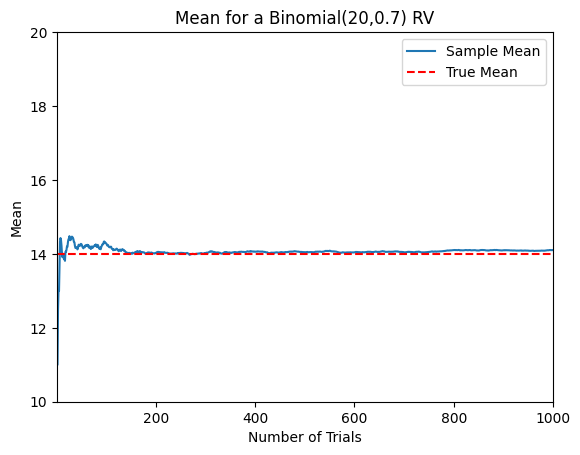

In [4]:
#Parameters
n = 20;
p = 0.7;
numtrials = 1000;

#Generate random samples
X = np.random.binomial(n,p,numtrials)

#Determine sample means
samplemeanX = np.zeros(numtrials)
for m in range(0,numtrials):
    #Your code to calculate the average of X[0],...,X[m]
    subtrials = X[0:m]
    if len(subtrials) == 0:
        samplemeanX[m] = X[m]
    else:
        samplemeanX[m] = sum(subtrials)/len(subtrials)
   
#Calculate true mean
truemeanX = n*p
    
#Plot
fig = plt.figure()
plt.plot(np.arange(1,numtrials+1),samplemeanX)
plt.plot(np.arange(1,numtrials+1),truemeanX*np.ones(numtrials),'r--')
plt.axis([1, numtrials, 10, 20])
plt.xlabel('Number of Trials')
plt.ylabel('Mean')
plt.legend(['Sample Mean','True Mean'])
plt.title(f"Mean for a Binomial({n},{p}) RV")
plt.show()
fig.savefig('hw3_s23_cpython.png')

Part d.  Generate 1000 realizations of a Poisson(5) random variable, estimates the probability P[X > b] using up to the mth  realization for m from 1 to realization for m from 1 to numtrials, and plot the resulting sequence of probability estimates as well as the exact probability. Your job is to fill in the code needed to generate the estimate the probability. Then, generate and turn in a plot of the estimated and exact probability.

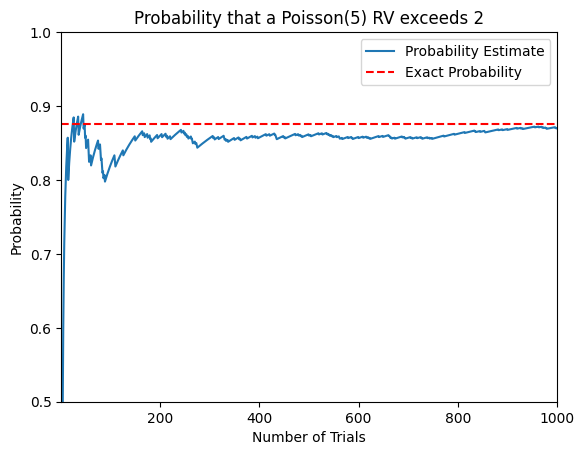

In [7]:
#Parameters
alpha = 5
b = 2
numtrials = 1000

#Generate Poisson(alpha) random variables
X = np.random.poisson(alpha,numtrials)

#Determine probability estimate
probestimate = np.zeros(numtrials)
for m in range(0,numtrials):
    #Your code for (number of times X[0],...,X[m] exceeds b)/(m+1)
    count = 0
    for k in range(0, m):
        if X[k] > b:
            count += 1
    probestimate[m] = count/(m+1)
    
#Determine exact probability (using complement)
complementprob = 0
for i in range(0,b+1):
    complementprob = complementprob + float(alpha**i)/(math.factorial(i)) * np.exp(-alpha)

exactprob = 1 - complementprob
    
#Plot
fig = plt.figure()
plt.plot(np.arange(1,numtrials+1),probestimate)
plt.plot(np.arange(1,numtrials+1),exactprob*np.ones(numtrials),'r--')
plt.axis([1, numtrials, 0.5, 1])
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.legend(['Probability Estimate','Exact Probability'])
plt.title(f"Probability that a Poisson({alpha}) RV exceeds {b}")
plt.show()
fig.savefig('hw3d_s23_python.png')